## Task 1
Import libraries

In [1]:
#import relevant libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import to_categorical

## Task 2
Load dataset using keras API

Dataset must be pre-processed before training the network, if you check image in the training, you will see pixel value range from 0 to 255, scale these values range from 0 to 1. [note it is important that both training and testing dataset pre-processed same way].

In [2]:
#loading the mnist dataset using keras API

mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
# Checking the structure of mnist dataset.
print(mnist)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [4]:
#Assigning images to test and train
(X_train, y_train), (X_test, y_test) = mnist

In [5]:
#Checking the shape of X_train (training dataset of pictures)

X_train.shape

(60000, 28, 28)

In [6]:
#Checking the shape of y_train (class numbers of training dataset)

y_train.shape

(60000,)

In [7]:
#Checking the shape of X_test (testing dataset of pictures)

X_test.shape

(10000, 28, 28)

In [8]:
#Checking the shape of y_test(class numbers of testing dataset)

y_test.shape

(10000,)

class number example : 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

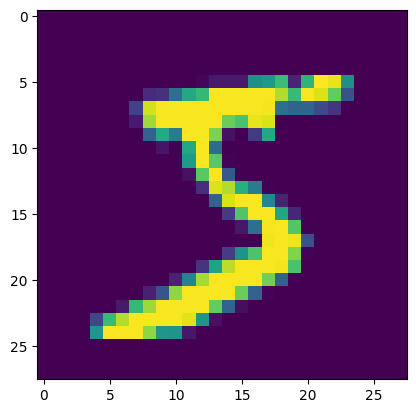

In [9]:
#Summary, showing image

#Tells us which number the first array is
print("class number example :", y_train[0])

#Shows us the first array
print(X_train[0])

#Plots what the array looks like
plt.imshow(X_train[0])

In [10]:
#Normalizing the data by dividing with 255.0
x_train = X_train/ 255.0
x_test = X_test / 255.0

print(X_train[0].shape[0] * X_train[0].shape[1])

'''
Grey scale images have pixel values from 0 to 255, which represents the intensities of the pixels.
Dividing the values by 255 can help us make the pixels into the same magnitude.
Normalization was applied here, rather than standardization, since normalization is the usual choice for image dataset.
'''

784


'\nGrey scale images have pixel values from 0 to 255, which represents the intensities of the pixels.\nDividing the values by 255 can help us make the pixels into the same magnitude.\nNormalization was applied here, rather than standardization, since normalization is the usual choice for image dataset.\n'

In [11]:
#Checking what x_train looks like after normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Task 3: Build a Classifier using MLP
The layer is the most fundamental component of a neural network. Data is put into layers, and they extract representations from it. Choose the number of stacking layers so that model representations should, be useful for the given task.

In [12]:
#Creating the neural network for the classifier model

#Random seed with key 42 was established for reproducibility.
tf.random.set_seed(42)

#Creating a sequential model using Keras. Sequential model linearly stacks layers one after another.
model = tf.keras.Sequential()

#Adding the input later of the network and indicating that the shape of the data is 28,28/
model.add(tf.keras.layers.Input(shape=[28,28]))

#Flattening the 28,28 2D input into a 1D array of 784.
#The next layer is expecting to receive a 1D array, which is why we need to do this step.
model.add(tf.keras.layers.Flatten())

#Creating 2 dense hidden layers, 300 and 100 neurons respectively, and using the ReLu activation.
#ReLu was used due to its non-linearity properties and efficiency.
#input shape 784 was from multiplying 28 and 28.
model.add(tf.keras.layers.Dense(300, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(100, activation="relu"))

#Creating the final output layer, which classifies the images from 0 to 9.
#Softmax activation is used for multiclass classfication and as the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

'''
The parameters above were chosen by replicating the clothes classification model.
This notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.
'''

'\nThe parameters above were chosen by replicating the clothes classification model.\nThis notebook aims to create a benchmark of the MNIST model so that we can compare its results to other models made.\n'

In [13]:
#Showing a summary of the model created.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Compile the Model
A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

Loss function

Optimizer

Metrics

In [14]:
#Compiling the model by configuring the loss, optimizer, and metrics paramters.
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=['accuracy'])

#The parameters were from clothes classification model.
#Sparse Categorical Crossentropy used for data with sparse labels.
#sgd means training the model using stochastic gradient descent. This may not be the best for MNIST.
# Accuracy was used as a metric to evaluate the model's success.

## Task 5: Train and Test the model.
a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [15]:
#Training the model with 20 epochs.
#20 epochs will be used across all notebooks for the MNIST dataset for uniformity.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=512)

#A mini batch was selected to make the training less computationally expensive. A batch size of 512 means that we are processing 512 examples from the training dataset.

Epoch 1/20
118/118 [==============================] - 5s 34ms/step - loss: 1.9401 - accuracy: 0.4781 - val_loss: 1.5165 - val_accuracy: 0.7098
Epoch 2/20
118/118 [==============================] - 4s 33ms/step - loss: 1.2069 - accuracy: 0.7641 - val_loss: 0.9106 - val_accuracy: 0.8152
Epoch 3/20
118/118 [==============================] - 5s 42ms/step - loss: 0.7942 - accuracy: 0.8269 - val_loss: 0.6542 - val_accuracy: 0.8535
Epoch 4/20
118/118 [==============================] - 4s 32ms/step - loss: 0.6145 - accuracy: 0.8537 - val_loss: 0.5346 - val_accuracy: 0.8723
Epoch 5/20
118/118 [==============================] - 3s 28ms/step - loss: 0.5224 - accuracy: 0.8705 - val_loss: 0.4670 - val_accuracy: 0.8823
Epoch 6/20
118/118 [==============================] - 3s 27ms/step - loss: 0.4666 - accuracy: 0.8808 - val_loss: 0.4255 - val_accuracy: 0.8893
Epoch 7/20
118/118 [==============================] - 3s 26ms/step - loss: 0.4295 - accuracy: 0.8878 - val_loss: 0.3970 - val_accuracy: 0.8950

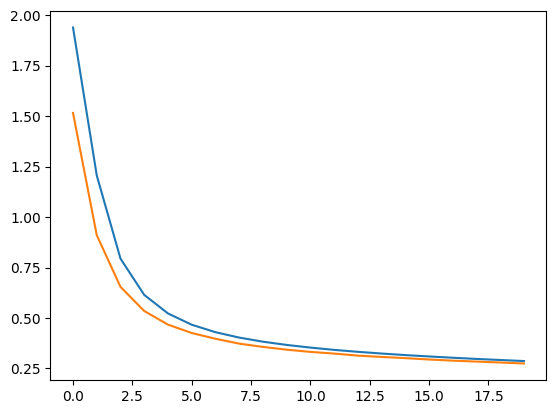

In [16]:
#Visualising the training loss and validation loss of the model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#We can see that around 8 epochs, loss's decrease started to slow down.

In [17]:
#Evaluating the test loss and accuracy of the model.
model.evaluate(X_test, y_test)

#The loss is extremely high at 34.58.
#Accuracy seems high, but it could be better.

313/313 [==============================] - 1s 2ms/step - loss: 35.0783 - accuracy: 0.9196


[35.07832717895508, 0.9196000099182129]

In [18]:
#Use model to make predictions about the test set

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#Taking the first 3 arrays of the test set, which shows that they are 7, 2, and 1.

1/1 [==============================] - 0s 94ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([7, 2, 1])

In [20]:
#Checking the model's prediction vs test set's actual label.
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)